In [27]:
%load_ext autoreload
import numpy as np
from tqdm import tqdm_notebook
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from copy import copy
from itertools import combinations
from collections import defaultdict, Counter
from scipy.spatial import distance
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors, KernelDensity
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from scipy.spatial import distance
from IPython.core.debugger import set_trace
from IPython.display import clear_output
from utils import *
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# paths to the databases containing the PCA and Isomap projections 
root = './separate_datasets_transformed/'
root_pca = './separate_datasets_proj/'
DATASETS = ['AGP', 'ptb', 't2d', 'ibd']
N_DATASETS = len(DATASETS)

paths = filter_paths([os.path.join(root,path) for path in os.listdir(root)], keywords=DATASETS)
paths_pca = filter_paths([os.path.join(root_pca,path) for path in os.listdir(root_pca)], keywords=DATASETS)
paths_mf_lle = filter_paths(paths, keywords=['lle'])
paths_mf_isomap = filter_paths(paths, keywords=['isomap'])

In [8]:
data_pca = unpack_data(paths_pca)
data_lle = unpack_data(paths_mf_lle)
data_isomap = unpack_data(paths_mf_isomap)
# data_ae = unpack_data(paths_mf_ae)

In [72]:
# X,y = data_pca['ibd_proj_o'], None
X,y = make_blobs(n_samples=1000, n_features=2, centers=np.array([[5,5],[-5,5], [0,-5]]))

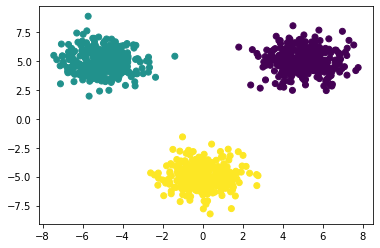

In [73]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [88]:
# plt.figure(figsize=(5,5), dpi=200)
# X = X[np.argsort(y)]
# plt.imshow(pairwise_distances(X))
# plt.show()

In [67]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)

In [68]:
sample_times = 50
results = []
preds = []
for i in tqdm_notebook(range(sample_times)):
    samples = kde.sample(n_samples=100, random_state=i)

    cluster_results, cluster_preds = clustering({'data':X}, 
                                                KMeans, 
                                                np.arange(2, 10, 1), 
                                                dbscan=False, 
                                                dbscan_params_dict=None)
    results.append(cluster_results)
    preds.append(cluster_preds)
clear_output()

In [69]:
results_dbind = np.array([[v[0] for k,v in r['data'].items()] for r in results])
results_silh = np.array([[v[1] for k,v in r['data'].items()] for r in results])

In [70]:
V_total_dbind = results_dbind.var(0).sum()
V_total_silh = results_silh.var(0).sum()
V_total = V_total_dbind + V_total_silh

In [71]:
V_total

0.004948856823002167

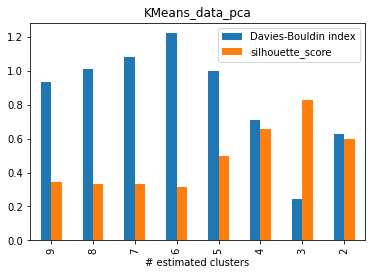

In [43]:
# plot_proj_clustering(results[0], method='pca', suptitle='KMeans')